# Ch3 신경망

3.2.2 계단신경망 구현하기 

In [1]:
def step_function(x):
    if x > 0 :
        return 1
    else:
        return 0 
#이 함수는 부동소수점만 받아 들일수 있다. array또한 받아들이게 하기 위해서는 밑의 구현을 따라야 한다. 

In [2]:
def step_function(x):
    y =x > 0
    return y.astype(np.int)
# 이것이 어떻게 step function이 되는가? 

In [3]:
import numpy as np 

In [4]:
x= np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [6]:
y = x >0
y
# < , > 와 같은 비교연산자들은 bool type이다. 이것을 y.shape(np.int)를 통해 False:0, True:1로 변환한다. 

array([False,  True,  True])

In [8]:
y = y.astype(np.int)
y

array([0, 1, 1])

3.2.3 계단함수의 그래프

In [9]:
import matplotlib.pyplot as plt

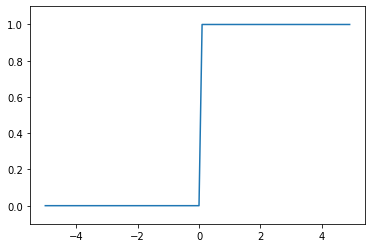

In [11]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y= step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

3.2.4 시그모이드 함수 구현하기

In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

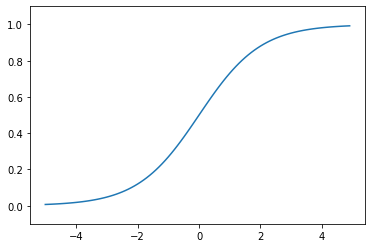

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y= sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

3.2.7 ReLU(Rectified Linear Unit): 책의 후반부에 많이 사용

In [21]:
#구현
def relu(x):
    return np.maximum(0,x)
# x축이 0이하인 곳에서는 0이 출력

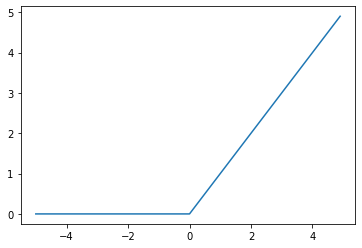

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.show()

3.3. 다차원 배열의 계산

In [23]:
import numpy as np 
A = np. array([1,2,3,4])
print(A)

[1 2 3 4]


In [24]:
np.ndim(A)
#number of dimension

1

In [27]:
A.shape
#튜플을 반환한다; 원이 높아지더라도 통일된 형태로 출력하기 위함. 

(4,)

In [34]:
A.shape
A.shape[0]
# A.shape는 ( 4,)로 출력. A.shape[0]는 4로 출력이 된다. 

(4,)

In [31]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [32]:
B.ndim

2

In [33]:
B.shape

(3, 2)

3.2.2 행렬의 곱. 선형대수에서 하는것과 같은 곱셈. Element wise 아니다. 

In [35]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)
#당연하게 np.dot(A,B)와 np.dot(B,A)값은 다르다.
#행렬의 columns과 row를 곱하기 전에 맞춰야함. 

array([[19, 22],
       [43, 50]])

In [36]:
np.dot(B,A)

array([[23, 34],
       [31, 46]])

3.3.3 신경망에서의 행렬의 곱

In [37]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


# 3층 신경망 구현하기

In [39]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [40]:
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [42]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 =np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [44]:
A2 = np.dot(Z1, W2)+ B2
Z2 = sigmoid(A2)

In [46]:
#출력층의 함수; 항등함수를 정의. 
def i_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = i_function(A3)

## 3.4.3 구현 정리

In [48]:
def init_network():
    network = {} #network라는 딕셔너리 생성
    network['W1'] = np.array([[0.1, 0.3, 0.3], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
#   KEY             Value
    return network

In [50]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = i_function(a3)
    
    return y

In [52]:
network = init_network()
x= np.array([1.0, 0.5])
y= forward(network, x)
print(y)

[0.31571247 0.69377343]


#  3.5 출력층 설계하기 

In [54]:
# softmax의 구현 
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [56]:
#모든 원소의 합
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [58]:
y = exp_a /sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [59]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

### sotmax 구현 시 주의점
#### exp^10은 20000이 넘는다. 지수 함수이므로 기하급수적으로 늘어난다. 이로인해 수치가 불안정해진다.  >  inf 가 출력

In [60]:
a =np.array([1010, 1000, 900])
np.exp(a)/np.sum(np.exp(a))

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [61]:
c = np.max(a)
a-c

array([   0,  -10, -110])

In [62]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

In [40]:
def softmax(a):
    c= np.max(a)
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y= exp_a / sum_exp_a
    return y

In [64]:
a = np.array([0.3, 2.9, 4.0])
y= softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [65]:
np.sum(y)

1.0

#### y의 출력 총합이 1이 된다는것은 softmax의 중요한 성질이다
#### 이로 인해 softmax 함수의 출력을 확률로 해석 가능하다. 
#### 출력층의 갯수는 구분하려는 이미지(예를들어)의 갯수와 맞아야 함

# 3.6 손글씨 숫자 인식

## 3.6.1 MNIST 데이터 셋

In [27]:
import sys ,os
sys.path.append(os.pardir) #부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

In [28]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)
#load mnist의 인수로는 normalize, flatten, on_hot_label 세가지 설정가능. 모두 bool

In [29]:
print(x_train.shape)
print(t_train.shape)
#훈련이미지, 훈련 레이블
print(x_test.shape)
print(t_test.shape)
#시험 이미지, 시험 레이블

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [35]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    # numpy로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환 이것은 Image.formarray()가 수행.
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28,28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


## 3.6.2 신경망의 추론 정리

In [36]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [41]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt +=1

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))
# NameError : pickle is not defined >> import pickle안해서 생긴오류 ㅆㅎㅌㅊ

Accuracy:0.9352


## 3.6.3 배치 처리

In [42]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [49]:
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


#### 배치(batch): 하나로 묶은 입력 데이터 ; MNIST에서는 여러개의 이미지를 묶어서 처리
#### 이점: 컴퓨터 계산시 속도 향상. 이미지 1장 처리 시간을 대폭 줄여준다. 
#### 1. 수치 계산 라이브러리들은 큰 배열을 효율적으로 처리할 수 있도록 최적화 되어있다.
#### 2. 커다란 신경망에서는 데이터 전소이 병목(bottle neck)으로 작용하는 경우가 많은데 이를 줄여준다

In [50]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

# for 함수에서 start 0, end len(x)-1, step 100
for i in range(0, len(x), batch_size):
    x_batch=x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    
    p = np.argmax(y_batch, axis =1)
    # axis = 1 > 100 * 10 배열 중에서 1번째 차원을 구성하는 각 원소에서 최댓값 인덱스를 찾도록 한것. 아래에 예제.
    
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [52]:
#axis=1에 대한 예제
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y= np.argmax(x, axis=1)
print(y)

# [1 2 1 0] 출력된다. argmax로 인해 각 1차원 배열 안의 1번째, 2번째, 1번째, 0번째 원소가 가장 크다고 출력된것. 

[1 2 1 0]


In [53]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print( y == t)

[ True  True False  True]


In [55]:
np.sum(y==t)
#True의 갯수를 구한다. 

3

In [ ]:
a = 1
b = 2 
a+b
